In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and Analysis

[kaggle](https://www.kaggle.com/datasets/vimalpillai/mailcustomers)

In [2]:
customers_data = pd.read_csv('Mall_Customers.csv')

In [3]:
# printing the first 5 rows
customers_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customers_data.rename(columns={'Genre':'Gender'},inplace=True)

In [5]:
customers_data.shape

(200, 5)

In [6]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customers_data.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Choosing Annual Income and Spending Score

In [8]:
# customers_data.iloc[:,[3,4]].values

In [9]:
x = customers_data.iloc[:,[3,4]].values

In [11]:
import warnings
warnings.filterwarnings('ignore')

### Choosing No.Of Clusters
- WCSS -> Within Clusters Sum Of Square

In [12]:
# Finding the wcss
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [13]:
print(wcss)

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21862.09267218289, 19672.07284901432]


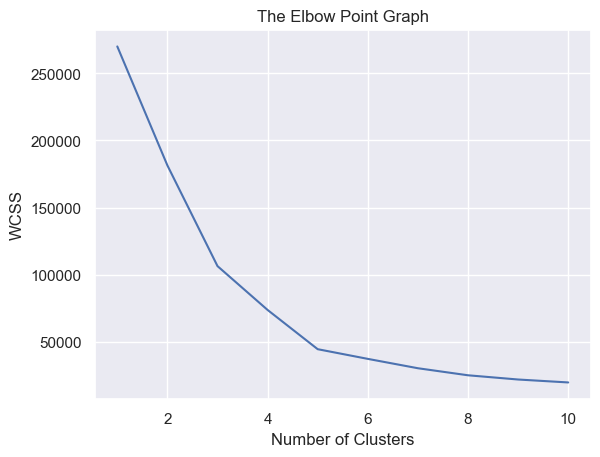

In [14]:
# Plotting the Elbow Plot
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum No.of Clusters is 5

In [15]:
# Training K Means Clustering
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [16]:
Y = kmeans.fit_predict(x)
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


Text(0, 0.5, 'Spending Score')

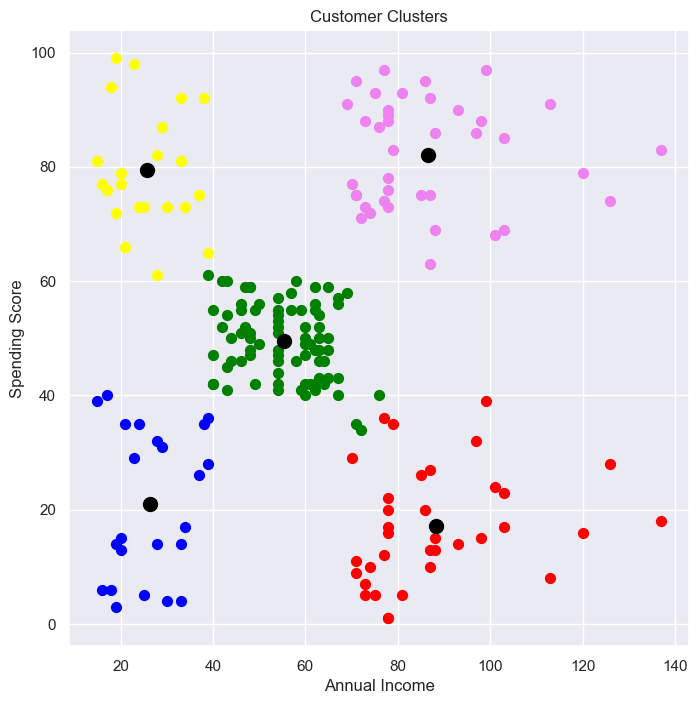

In [17]:
# Visualizing Clusters
plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0],x[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[Y==1,0],x[Y==1,1],s=50,c='red',label='Cluster 1')
plt.scatter(x[Y==2,0],x[Y==2,1],s=50,c='blue',label='Cluster 1')
plt.scatter(x[Y==3,0],x[Y==3,1],s=50,c='yellow',label='Cluster 1')
plt.scatter(x[Y==4,0],x[Y==4,1],s=50,c='violet',label='Cluster 1')

# potting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')

plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')


**INSIGHTS**

In [17]:
# blue have less Annual income[10-40] k$ and less spending Score[5-40]
# red have high Annual Income[70-140] k$ and less spending Score[5-40]
# Green have 40-70 k$ Annual Income and 40-60 Spending Score
# Yellow have less Annual Income [20-40] k$ and high spending score [60-100]
# Violet Clusters have high Annual Income 70-140 k$ and High Spending Score [60-100]